In [1]:
import pandas as pd
import numpy as np
import time as time
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = []
for i in range(1,2):
    df.append(pd.read_csv(f'/Users/alex/Documents/Gambling/Blackjack/2deck_3to2_H17_tencount_{i}.csv', index_col=0))
df = pd.concat(df).reset_index(drop=True)
# df['hiopt1_true'] = df['hiopt1']/df['decks_remaining']
# df['hilow_true'] = df['hilow']/df['decks_remaining']


/Users/alex/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# Ten Count

In [2]:
df

,player,dealer,decks_remaining,hilow,tencount,action,payout,dealer_bust,hilow_bet,tencount_bet
0,6,T,1.923077,0.520000,0.000000,H,-1.0,False,0.000000,0.000000
1,12,T,1.807692,-1.106383,-2.212766,H,-1.0,False,-1.061224,-2.122449
2,16,7,1.711538,-0.584270,-1.168539,H,1.0,False,-0.559140,-1.118280
3,A9,7,1.615385,-1.238095,-0.619048,S,1.0,True,-0.590909,-1.772727
4,13,T,1.519231,-1.974684,-1.316456,H,-1.0,False,-1.253012,0.626506
...,...,...,...,...,...,...,...,...,...,...
3080926,12,7,1.134615,-2.644068,-3.525424,H,1.0,True,-2.476190,-3.301587
3080927,TT,T,1.000000,-5.000000,-9.000000,S,0.0,False,-1.857143,-2.785714
3080928,88,T,0.923077,-7.583333,-11.916667,P,-2.0,False,-6.000000,-11.000000
3080929,8,8,0.807692,-8.666667,-13.619048,H,0.0,False,-10.173913,-15.826087


In [20]:
df['hilow_int'] = df['hilow_bet'].round(0).astype(int)
df['tencount_int'] = df['tencount_bet'].round(0).astype(int)
pd.DataFrame((df.groupby('tencount_int')['payout'].count()/len(df)).loc[-20:20])

,payout
tencount_int,
-20,0.000546
-19,0.000640
-18,0.000999
-17,0.001379
-16,0.001882
-15,0.002588
-14,0.003520
-13,0.004402
-12,0.006072


In [27]:
df['push'] = np.where(df['payout']==0, 10, -1)

In [28]:
X = sm.add_constant(df['hilow_bet'])
Y = df['push']
r = sm.OLS(Y, X).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   push   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     275.6
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           6.92e-62
Time:                        10:36:15   Log-Likelihood:            -7.8238e+06
No. Observations:             3080931   AIC:                         1.565e+07
Df Residuals:                 3080929   BIC:                         1.565e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0641      0.002    -36.620      0.000      -0.068      -0.061
hilow_bet      0.0088      0.001     16.601      0.000       0.008       0.010
==============================================================================
Omnibus:                  1800258.562   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10605663.329
Skew:                           2.978   Prob(JB):                         0.00
Kurtosis:                       9.867   Cond. No.                         3.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
X = sm.add_constant(df['tencount_bet'])
Y = df['push']
r = sm.OLS(Y, X).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   push   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     126.4
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           2.51e-29
Time:                        10:36:18   Log-Likelihood:            -7.8238e+06
No. Observations:             3080931   AIC:                         1.565e+07
Df Residuals:                 3080929   BIC:                         1.565e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0649      0.002    -37.107      0.000      -0.068      -0.061
tencount_bet     0.0039      0.000     11.243      0.000       0.003       0.005
==============================================================================
Omnibus:                  1800382.302   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10607498.224
Skew:                           2.978   Prob(JB):                         0.00
Kurtosis:                       9.868   Cond. No.                         5.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
df.groupby('tencount_int')['push'].mean().loc[0:20]

tencount_int
0     0.084614
1     0.085461
2     0.084820
3     0.085832
4     0.086464
5     0.086776
6     0.088549
7     0.085956
8     0.089015
9     0.089563
10    0.089962
11    0.086636
12    0.088475
13    0.094839
14    0.094683
15    0.093297
16    0.086409
17    0.090721
18    0.096890
19    0.099542
20    0.096750
Name: push, dtype: float64

In [30]:
df[['tencount_bet', 'hilow_bet', 'push']].corr()

,tencount_bet,hilow_bet,push
tencount_bet,1.000000,0.840555,0.006405
hilow_bet,0.840555,1.000000,0.009457
push,0.006405,0.009457,1.000000


In [2]:
mask = (df['decks_remaining'] == df['decks_remaining'].shift(1)) | (df['decks_remaining'] == df['decks_remaining'].shift(-1))
fltrd = df.loc[mask]
fltrd

,player,dealer,decks_remaining,hiopt1,hilow,aces,action,payout,hiopt1_true,hilow_true
1,13,3,1.826923,3,3,0,H,-1.0,1.642105,1.642105
2,13,3,1.826923,3,3,0,S,1.0,1.642105,1.642105
8,15,T,1.173077,3,4,-1,H,-1.0,2.557377,3.409836
9,15,T,1.173077,3,4,-1,S,-1.0,2.557377,3.409836
10,15,T,1.173077,3,4,-1,Rh,-0.5,2.557377,3.409836
...,...,...,...,...,...,...,...,...,...,...
100000062,10,T,1.846154,0,-1,-1,D,2.0,0.000000,-0.541667
100000063,10,T,1.846154,0,-1,-1,H,1.0,0.000000,-0.541667
100000071,15,T,1.000000,0,-2,-4,H,-1.0,0.000000,-2.000000
100000072,15,T,1.000000,0,-2,-4,S,-1.0,0.000000,-2.000000


In [3]:
g = fltrd.groupby(['player', 'dealer', 'action'])
uniq = g['payout'].mean().index.unique()

In [4]:
system = 'hilow'
hilow = []

for p, d, a in uniq:
    temp = fltrd.loc[(fltrd['player']==p) & (fltrd['dealer']==d) & (fltrd['action']==a)]
    X = sm.add_constant(temp[system+'_true'])
    Y = temp['payout']
    r = sm.OLS(Y, X).fit()
    hilow.append({'player': p, 'dealer': d, 'action': a, 'const': r.params['const'], 'beta': r.params[system+'_true']})
    print(p, d, a)
    print(r.params)
    
hilow = pd.DataFrame(hilow)

10 9 D
const         0.132852
hilow_true    0.021069
dtype: float64
10 9 H
const         0.108879
hilow_true    0.006957
dtype: float64
10 A D
const        -0.018257
hilow_true    0.034463
dtype: float64
10 A H
const         0.035600
hilow_true    0.010156
dtype: float64
10 T D
const        -0.003205
hilow_true    0.012945
dtype: float64
10 T H
const         0.028241
hilow_true    0.002978
dtype: float64
11 A D
const         0.105750
hilow_true    0.036421
dtype: float64
11 A H
const         0.107038
hilow_true    0.011297
dtype: float64
12 2 H
const        -0.251392
hilow_true   -0.002051
dtype: float64
12 2 S
const        -0.294303
hilow_true    0.009364
dtype: float64
12 3 H
const        -0.229395
hilow_true   -0.001580
dtype: float64
12 3 S
const        -0.255556
hilow_true    0.011592
dtype: float64
13 2 H
const        -0.306039
hilow_true   -0.004065
dtype: float64
13 2 S
const        -0.294768
hilow_true    0.010262
dtype: float64
13 3 H
const        -0.288288
hilow_true   -0.00

In [5]:
hilow_lookup = pd.Series()

uniq = hilow.groupby(['player', 'dealer'])['const'].mean().index.unique()
for p, d in uniq:
    x = np.arange(-9, 10)
    actions = pd.DataFrame(index=x, data={'edge': -10, 'action': ' '})
    temp = hilow.loc[(hilow['player']==p) & (hilow['dealer']==d)].sort_values('action')
    for i, row in temp.iterrows():
        y = x * row['beta'] + row['const']
        actions['action'] = actions['action'].where(actions['edge'] > y, row['action'])
        actions['edge'] = actions['edge'].where(actions['edge'] > y, y)
    actions.index = p + ' ' + d + ' ' + actions.index.astype(str)
    hilow_lookup = pd.concat([hilow_lookup, actions['action']])
hilow_lookup

<ipython-input-5-951d95489d2c>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hilow_lookup = pd.Series()


10 9 -9     H
10 9 -8     H
10 9 -7     H
10 9 -6     H
10 9 -5     H
           ..
A8 6 5     Ds
A8 6 6     Ds
A8 6 7     Ds
A8 6 8     Ds
A8 6 9     Ds
Length: 969, dtype: object

In [ ]:
system = 'hiopt1'
hilow = []

for p, d, a in uniq:
    temp = fltrd.loc[(fltrd['player']==p) & (fltrd['dealer']==d) & (fltrd['action']==a)]
    X = sm.add_constant(temp[system+'_true'])
    Y = temp['payout']
    r = sm.OLS(Y, X).fit()
    hiopt1.append({'player': p, 'dealer': d, 'action': a, 'const': r.params['const'], 'beta': r.params[system+'_true']})
    print(p, d, a)
    print(r.params)
    
hiopt1 = pd.DataFrame(hiopt1)

In [ ]:
hiopt1_lookup = pd.Series()

uniq = hiopt1.groupby(['player', 'dealer'])['const'].mean().index.unique()
for p, d in uniq:
    x = np.arange(-9, 10)
    actions = pd.DataFrame(index=x, data={'edge': -10, 'action': ' '})
    temp = hiopt1.loc[(hiopt1['player']==p) & (hiopt1['dealer']==d)].sort_values('action')
    for i, row in temp.iterrows():
        y = x * row['beta'] + row['const']
        actions['action'] = actions['action'].where(actions['edge'] > y, row['action'])
        actions['edge'] = actions['edge'].where(actions['edge'] > y, y)
    actions.index = p + ' ' + d + ' ' + actions.index.astype(str)
    hiopt1_lookup = pd.concat([hiopt1_lookup, actions['action']])
hiopt1_lookup

In [6]:
for system in ['hilow']: # ,'hiopt1'
    c = np.where(fltrd[system+'_true'].abs() < 9, fltrd[system+'_true'].round(0), 9 * np.sign(fltrd[system+'_true'])).astype(int).astype(str)
    fltrd[system+'_lookup'] = fltrd['player'] + ' ' + fltrd['dealer'] + ' ' + c

<ipython-input-6-4e3cf8e11419>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fltrd[system+'_lookup'] = fltrd['player'] + ' ' + fltrd['dealer'] + ' ' + c


In [3]:
act = pd.read_csv('/Users/alex/Documents/Gambling/Blackjack/action_table_2deck_H17.csv', index_col=0)
act_stack = act.stack()
# act_stack.index = act_stack.index.levels[0] + ' ' + act_stack.index.levels[1]
act_stack = act_stack.reset_index()
act_stack = pd.Series(data=act_stack[0].values, index=act_stack['level_0'] + ' ' + act_stack['level_1'])
act_stack

3 2     H
3 3     H
3 4     H
3 5     H
3 6     H
       ..
TT 7    S
TT 8    S
TT 9    S
TT T    S
TT A    S
Length: 360, dtype: object

In [8]:
# fltrd['hiopt1_action'] = hiopt1_lookup.loc[fltrd['hiopt1_lookup']].values
fltrd['hilow_action'] = hilow_lookup.loc[fltrd['hilow_lookup']].values
fltrd['basic_action'] = act_stack.loc[fltrd['player'] + ' ' + fltrd['dealer']].values

# fltrd['hiopt1_payout'] = np.where(fltrd['hiopt1_action']==fltrd['action'], fltrd['payout'], np.nan)
fltrd['hilow_payout'] = np.where(fltrd['hilow_action']==fltrd['action'], fltrd['payout'], np.nan)
fltrd['basic_payout'] = np.where(fltrd['basic_action']==fltrd['action'], fltrd['payout'], np.nan)

<ipython-input-8-65150464cb81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fltrd['hilow_action'] = hilow_lookup.loc[fltrd['hilow_lookup']].values
<ipython-input-8-65150464cb81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fltrd['basic_action'] = act_stack.loc[fltrd['player'] + ' ' + fltrd['dealer']].values
<ipython-input-8-65150464cb81>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [23]:
fltrd

,player,dealer,decks_remaining,hiopt1,hilow,aces,action,payout,hiopt1_true,hilow_true,hilow_lookup,hilow_action,basic_action,hilow_payout,basic_payout
1,13,3,1.826923,3,3,0,H,-1.0,1.642105,1.642105,13 3 2,S,S,NaN,NaN
2,13,3,1.826923,3,3,0,S,1.0,1.642105,1.642105,13 3 2,S,S,1.0,1.0
8,15,T,1.173077,3,4,-1,H,-1.0,2.557377,3.409836,15 T 3,Rh,Rh,NaN,NaN
9,15,T,1.173077,3,4,-1,S,-1.0,2.557377,3.409836,15 T 3,Rh,Rh,NaN,NaN
10,15,T,1.173077,3,4,-1,Rh,-0.5,2.557377,3.409836,15 T 3,Rh,Rh,-0.5,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999993,10,T,1.846154,0,-1,-1,D,2.0,0.000000,-0.541667,10 T -1,H,H,NaN,NaN
9999994,10,T,1.846154,0,-1,-1,H,1.0,0.000000,-0.541667,10 T -1,H,H,1.0,1.0
10000002,15,T,1.000000,0,-2,-4,H,-1.0,0.000000,-2.000000,15 T -2,H,Rh,-1.0,NaN
10000003,15,T,1.000000,0,-2,-4,S,-1.0,0.000000,-2.000000,15 T -2,H,Rh,NaN,NaN


## Drop Duplicate Hands

In [4]:
basic = act_stack.loc[fltrd['player'] + ' ' + fltrd['dealer']].values == fltrd['action']
df.drop(index=basic.loc[~basic].index, inplace=True)

1            False
2             True
8            False
9            False
10            True
             ...  
100000062    False
100000063     True
100000071    False
100000072    False
100000073     True
Name: action, Length: 32844378, dtype: bool

In [9]:
# df.to_csv('/Users/alex/Documents/Gambling/Blackjack/BasicStratHands_2deck_H17.csv')

In [11]:
pairs = ['22', '33', '44', '55', '66', '77', '88', '99', 'TT', 'AA']
df['isPair'] = df['player'].isin(pairs)
df['hilow_true_int'] = df['hilow_true'].round(0)
df

,player,dealer,decks_remaining,hiopt1,hilow,aces,action,payout,hiopt1_true,hilow_true,isPair,hilow_true_int
0,13,4,1.923077,2,2,0,S,-1.0,1.040000,1.040000,False,1.0
2,13,3,1.826923,3,3,0,S,1.0,1.642105,1.642105,False,2.0
3,12,T,1.730769,0,1,0,H,-1.0,0.000000,0.577778,False,1.0
4,12,8,1.634615,0,1,0,H,-1.0,0.000000,0.611765,False,1.0
5,A7,3,1.519231,3,3,-1,Ds,-2.0,1.974684,1.974684,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100000070,A3,T,1.134615,1,-1,-4,H,1.0,0.881356,-0.881356,False,-1.0
100000073,15,T,1.000000,0,-2,-4,Rh,-0.5,0.000000,-2.000000,False,-2.0
100000074,A6,4,0.923077,1,-2,-5,D,-2.0,1.083333,-2.166667,False,-2.0
100000075,TT,A,0.769231,1,-5,-8,S,0.0,1.300000,-6.500000,True,-6.0


In [15]:
df['isPair'].mean()

0.13389410324558806

<AxesSubplot:>

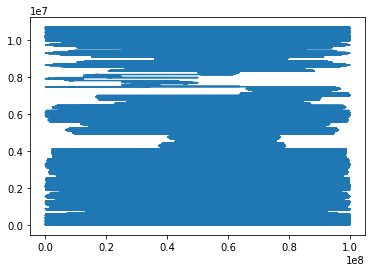

In [14]:
df.sort_values('hilow_true_int')['isPair'].cumsum().plot()

<AxesSubplot:xlabel='hilow_true_int'>

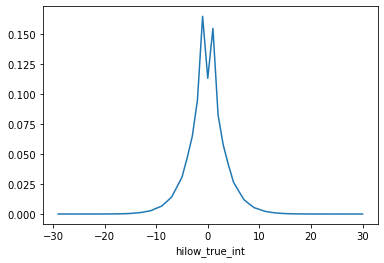

In [21]:
(df.groupby('hilow_true_int')['payout'].count()/len(df)).plot()


## ADD STRATEGY CHANGES TO DECISION TABLE

In [ ]:
# ADD STRATEGY CHANGES TO DECISION TABLE
uniq = hilow.groupby(['player', 'dealer'])['const'].mean().index.unique()
for p, d in uniq:
    x = np.arange(-9, 10)
    actions = pd.DataFrame(index=x, data={'edge': -10, 'action': ' '})
    temp = hilow.loc[(hilow['player']==p) & (hilow['dealer']==d)].sort_values('action')
    for i, row in temp.iterrows():
        y = x * row['beta'] + row['const']
        actions['action'] = actions['action'].where(actions['edge'] > y, row['action'])
        actions['edge'] = actions['edge'].where(actions['edge'] > y, y)
    a = act.loc[p, d]
    if actions.loc[0, 'action'] != a:
        print(f'Discrepancy in {p} vs {d}:')
        print(f'\tStated action: {a}')
        print('\tComputed action: ' + actions.loc[0, 'action'])
        a = actions.loc[0, 'action']
    new_a = a
    if (actions['action'] != a).any():
        a1 = actions.loc[-9, 'action']
        if a1 != a:
            new_a += ' ({}{})'.format(actions.loc[actions['action']==a1].index.max(), a1)
        a2 = actions.loc[9, 'action']
        if a2 != a:
            new_a += ' ({}{})'.format(actions.loc[actions['action']==a2].index.min(), a2)
        act.loc[p, d] = new_a
act.iloc[::-1].to_csv('/Users/alex/Downloads/action_table_hilow_2deck_H17.csv')
act.iloc[::-1]

In [10]:
rank = fltrd.groupby(['player', 'dealer'])[['basic_payout', 'hilow_payout']].mean()
rank['diff'] = rank['hilow_payout'] - rank['basic_payout']
rank.reset_index(inplace=True)
rank.insert(2, 'action', np.diag(act.loc[rank['player'], rank['dealer']]))
rank.sort_values('diff', ascending=False)

,player,dealer,action,basic_payout,hilow_payout,diff
3,11,A,D,0.094150,0.132375,0.038225
27,55,A,H,0.042167,0.065022,0.022855
50,A8,6,Ds,0.461846,0.480826,0.018980
23,44,4,H,0.065547,0.083467,0.017920
39,9,2,D,0.076468,0.093320,0.016852
13,15,T,Rh,-0.500000,-0.483596,0.016404
37,88,A,Rp,-0.500000,-0.484208,0.015792
36,8,6,H,0.121083,0.136480,0.015397
49,A8,5,S,0.447562,0.462210,0.014649
24,44,5,Ph,0.202770,0.214562,0.011792


In [11]:
rank.sort_values('diff', ascending=False).to_csv('/Users/alex/Downloads/action_ranking_hilow_2deck_H17.csv', index=False)

Discrepancy in 11 vs A:
	Stated action: D
	Computed action: H
Discrepancy in 33 vs 2:
	Stated action: Ph
	Computed action: H
Discrepancy in 33 vs 8:
	Stated action: H
	Computed action: P
Discrepancy in 77 vs A:
	Stated action: H
	Computed action: R
Discrepancy in 9 vs 2:
	Stated action: D
	Computed action: H
Discrepancy in A3 vs 4:
	Stated action: D
	Computed action: H
Discrepancy in A6 vs 2:
	Stated action: H
	Computed action: D
Discrepancy in A7 vs 2:
	Stated action: Ds
	Computed action: S

In [12]:
player = '17'
dealer = 'A'
plot_action_regressions(player, dealer)

NameError: name 'plot_action_regressions' is not defined

In [14]:
df

,player,dealer,decks_remaining,hiopt1,hilow,aces,action,payout,hiopt1_true,hilow_true
0,13,4,1.923077,2,2,0,S,-1.0,1.040000,1.040000
1,13,3,1.826923,3,3,0,H,-1.0,1.642105,1.642105
2,13,3,1.826923,3,3,0,S,1.0,1.642105,1.642105
3,12,T,1.730769,0,1,0,H,-1.0,0.000000,0.577778
4,12,8,1.634615,0,1,0,H,-1.0,0.000000,0.611765
...,...,...,...,...,...,...,...,...,...,...
10000003,15,T,1.000000,0,-2,-4,S,-1.0,0.000000,-2.000000
10000004,15,T,1.000000,0,-2,-4,Rh,-0.5,0.000000,-2.000000
10000005,A6,4,0.923077,1,-2,-5,D,-2.0,1.083333,-2.166667
10000006,TT,A,0.769231,1,-5,-8,S,0.0,1.300000,-6.500000


In [16]:
# uniq = regs.groupby(['player', 'dealer'])['const'].mean().index.unique()

def plot_action_regressions(p, d, regs=hilow):
    temp = regs.loc[(regs['player']==p) & (regs['dealer']==d)].sort_values('action')
    x = np.array(range(-9, 10))
    w = -.2
    for i, row in temp.iterrows():
        y = x * row['beta'] + row['const']
        plt.bar(x + w, y, width=.4/(len(temp)-1), label=row['action'])
        w += .4/(len(temp)-1)
    plt.title(p + ' vs ' + d)
    plt.xlabel(system)
    plt.ylabel('payout per $1 bet')
    plt.xticks(x, x)
    plt.legend()
    plt.show()

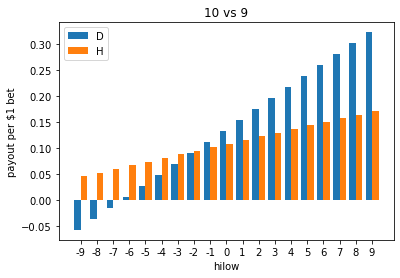

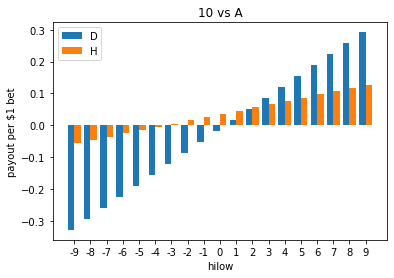

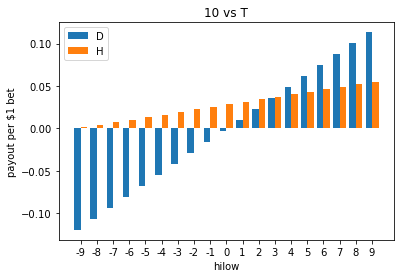

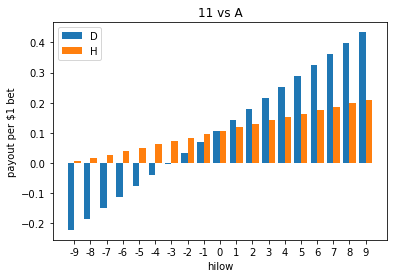

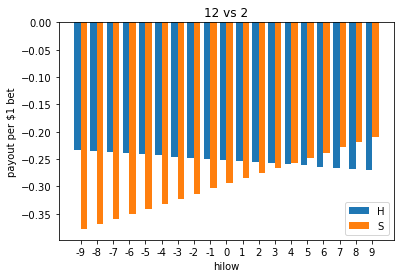

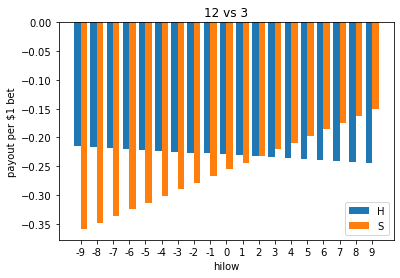

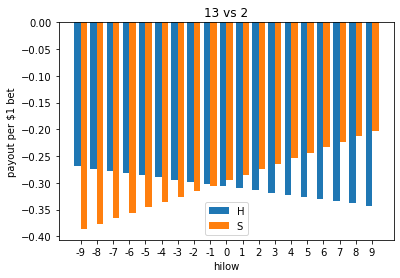

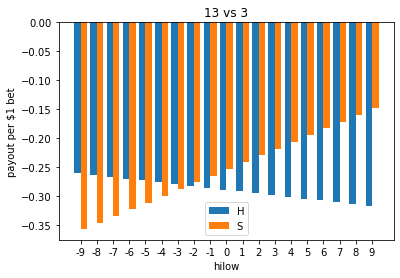

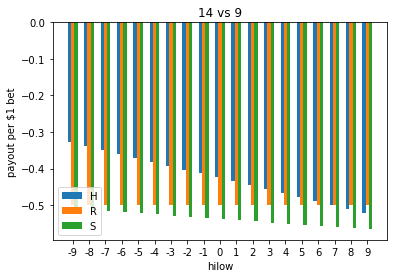

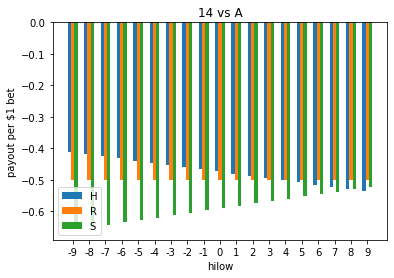

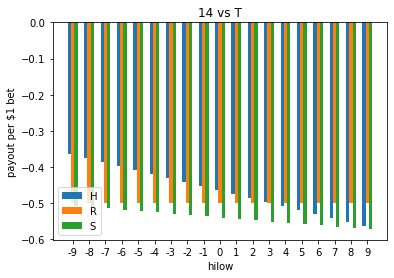

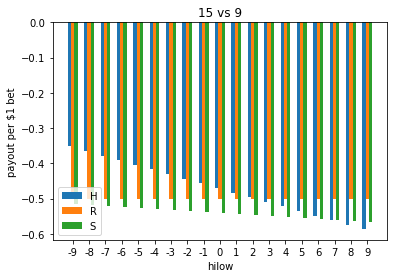

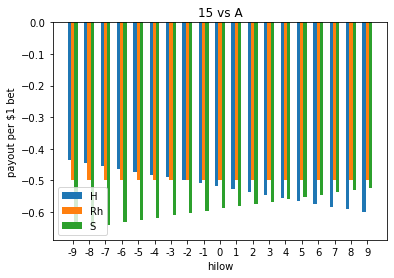

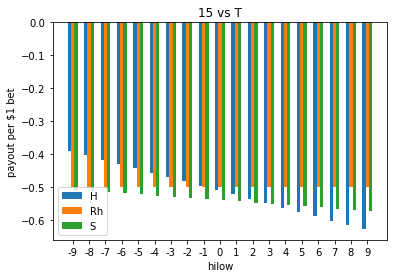

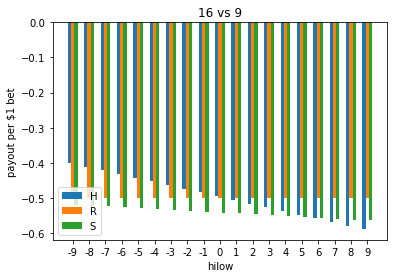

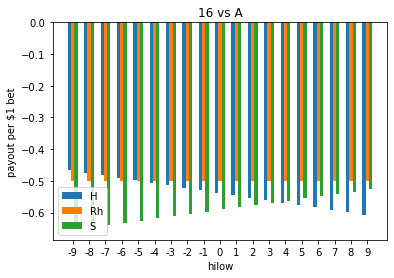

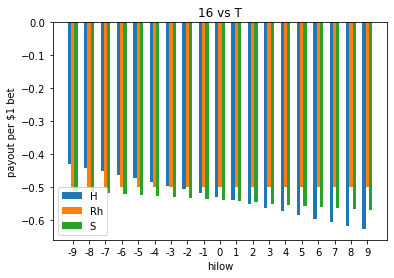

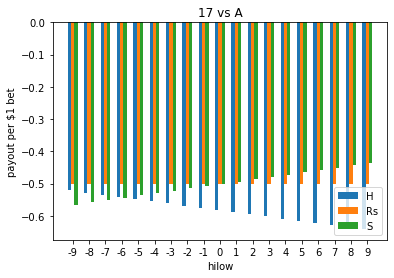

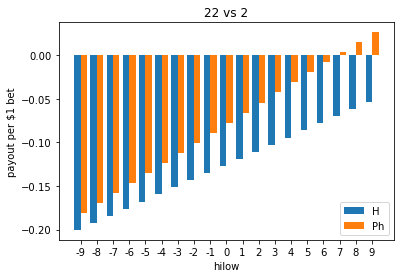

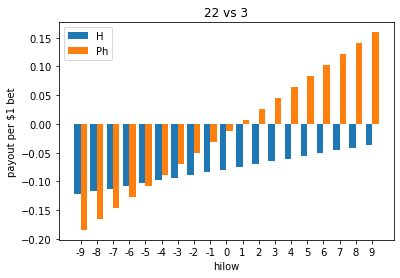

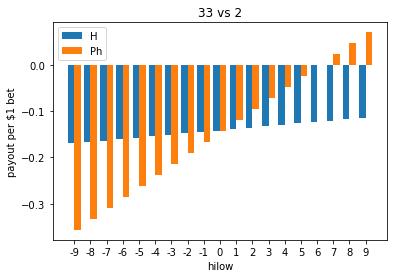

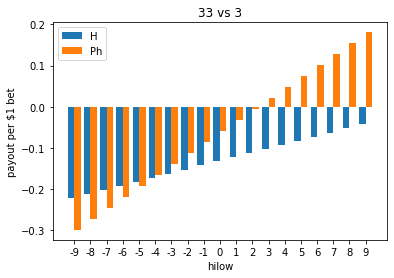

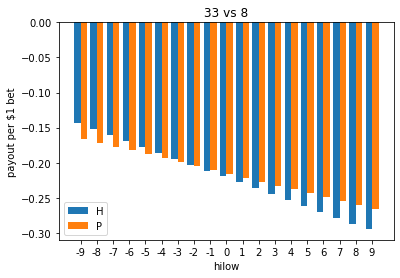

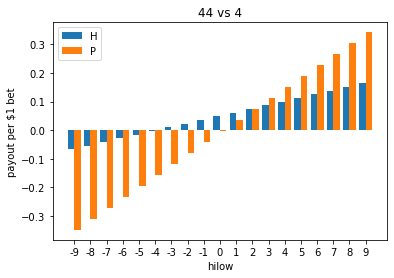

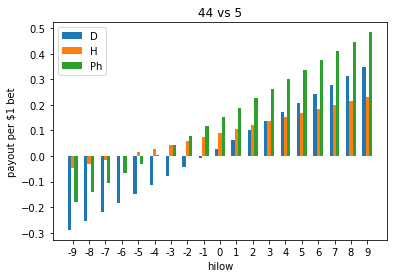

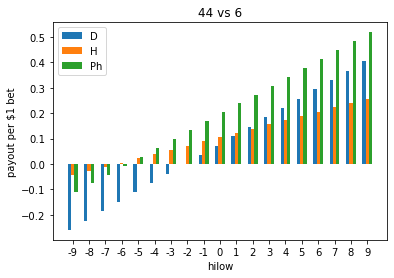

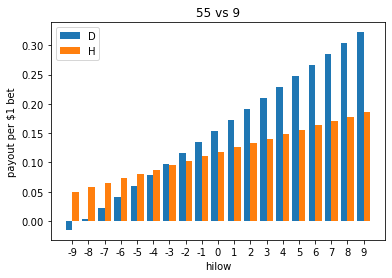

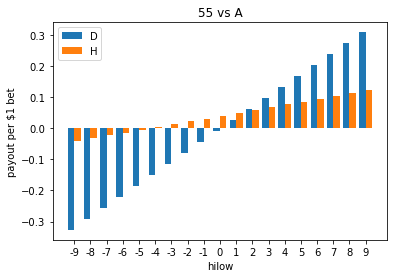

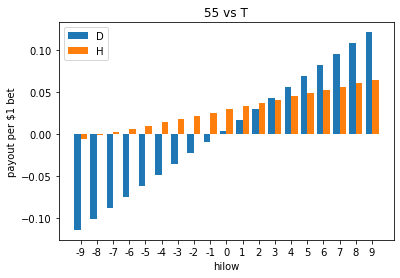

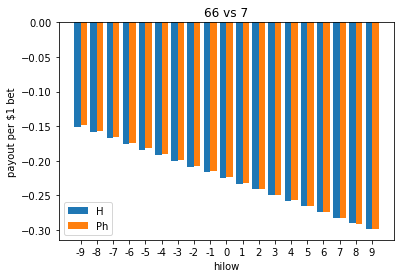

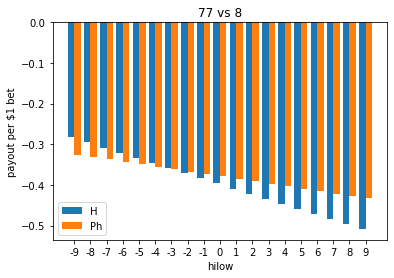

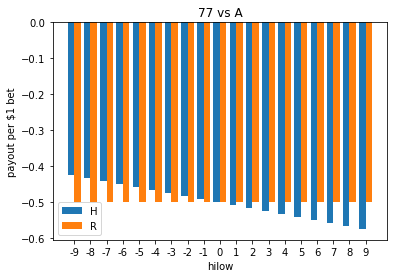

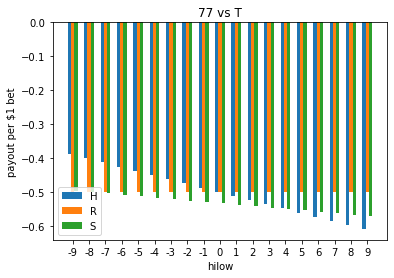

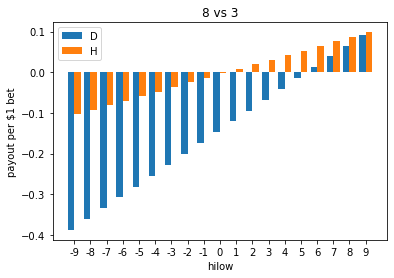

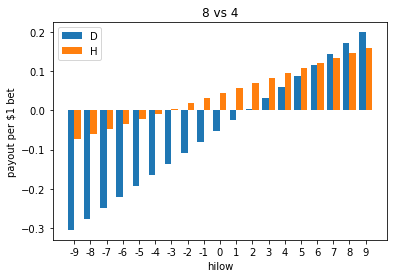

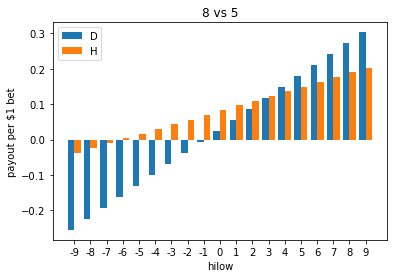

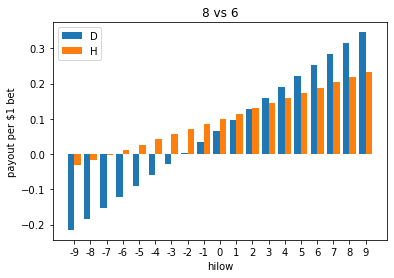

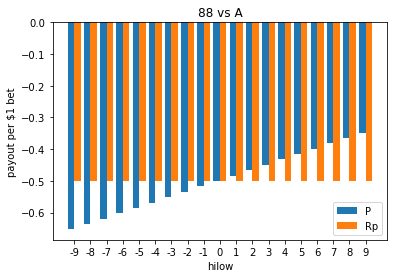

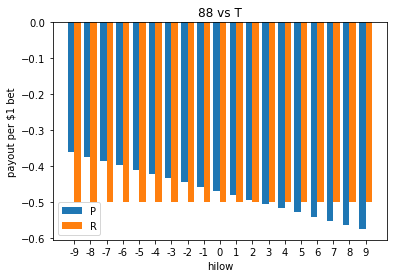

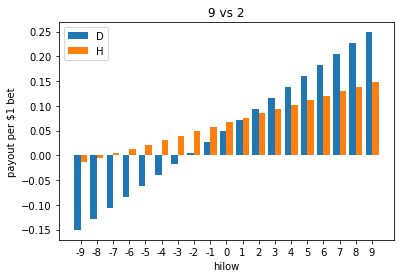

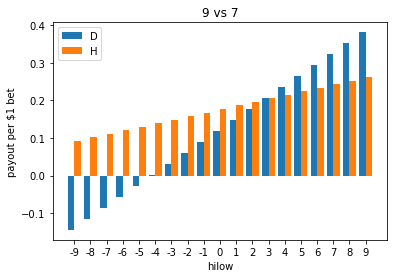

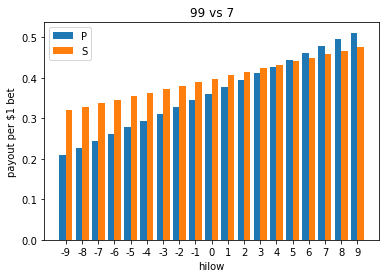

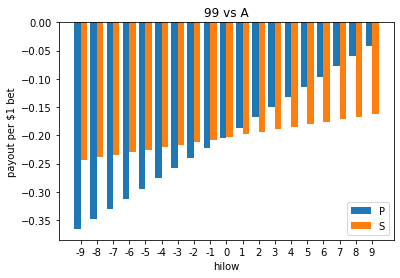

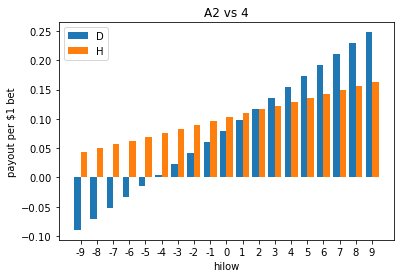

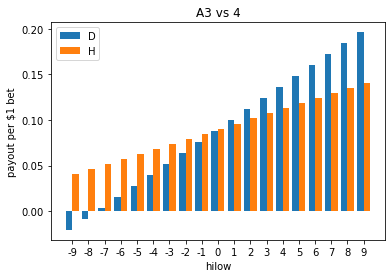

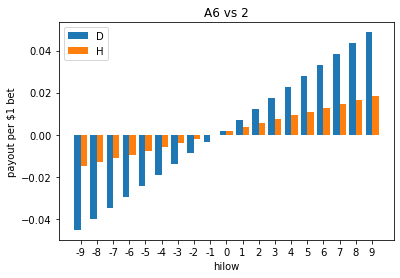

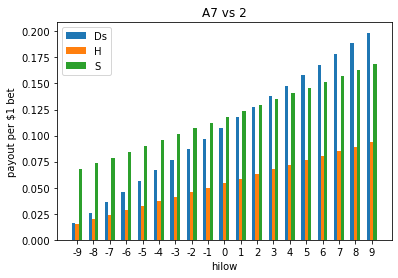

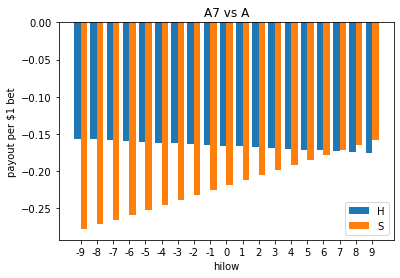

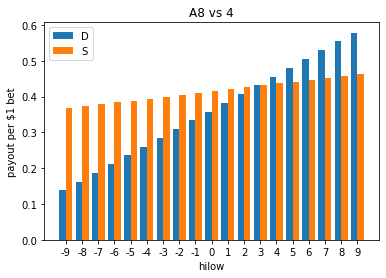

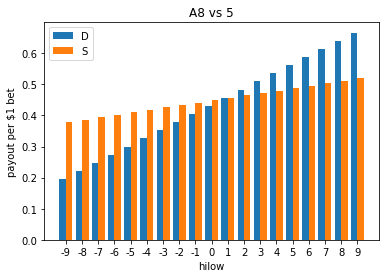

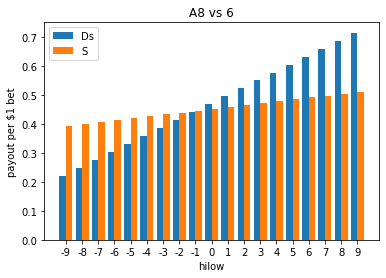

In [17]:
for p, d in uniq:
    plot_action_regressions(p, d)